In [27]:
# json
import json

# math
import math

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Random libraries and seeds:
import random
random.seed(2)
np.random.seed(2)

pd.set_option('display.max_columns', None)

In [28]:
# From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [29]:
import sklearn.model_selection as mds
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [32]:
def get_accuracy(number_groups, region):
    
    #print("datasets/%d/%s.csv" % (number_groups, region))
    data = pd.read_csv("datasets/%d/%s.csv" % (number_groups, region))
    
    data = pd.get_dummies(data, columns = ["attacktype1_txt",
                     "targtype1_txt",
                     "weaptype1_txt",
                     "natlty1_txt",
                     "weaptype1_txt",
                     "weapsubtype1_txt"])
    
    train, validate, test = np.split(data.sample(frac=1, random_state = 2), [int(.6*len(data)), int(.8*len(data))])
    
    X_train = train.drop(["gname", "region_txt"], axis=1)
    Y_train = train["gname"]
    
    X_val = validate.drop(["gname", "region_txt"], axis=1)
    Y_val = validate["gname"]
    
    X_test = test.drop(["gname", "region_txt"], axis=1)
    Y_test = test["gname"]
    
    # 70% train, 30% test
    #msk = np.random.rand(len(data_region)) < 0.7
    
    #X_train = X[msk]
    #Y_train = Y[msk]
    
    #X_test = X[~msk]
    #Y_test = Y[~msk]
    
    model = OneVsRestClassifier(RandomForestClassifier(random_state=2)).fit(X_train, Y_train)
    
    Y_pred = model.predict(X_val)
    
    return(model, (sum(Y_pred == Y_val) / len(Y_pred)), X_train, Y_train, X_val, Y_val, X_test, Y_test) # return accuracy

    #print("%s, %d/%d => %s" % (region, sum(Y_pred == Y_val), len(Y_pred), (sum(Y_pred == Y_val) / len(Y_pred))))
    #print(data_region["gname"].value_counts())
    #print("\n")

In [33]:
regions = ["Australasia & Oceania",
             "Central America & Caribbean",
             "Central Asia",
             "East Asia",
             "Eastern Europe",
             "Middle East & North Africa",
             "North America",
             "South America",
             "South Asia",
             "Southeast Asia",
             "Sub-Saharan Africa",
             "Western Europe"]

results = pd.DataFrame(columns=('region', 'groups', 'accuracy'))
results_list = []
i = 0

for region in regions:
    for n_groups in range(50):
        model, accuracy, X_train, Y_train, X_val, Y_val, X_test, Y_test = get_accuracy(n_groups + 1, region)
        results.loc[i] = [region, n_groups + 1, accuracy]
        results_list.append({"model": model, "region": region, "n_groups": n_groups + 1, "X_train": X_train, 
                             "Y_train": Y_train, "X_val": X_val, "Y_val": Y_val, "X_test": X_test, "Y_test": Y_test})
        print("Did %s n%d" % (region, n_groups + 1))
        i = i + 1


Did Australasia & Oceania n1
Did Australasia & Oceania n2
Did Australasia & Oceania n3
Did Australasia & Oceania n4
Did Australasia & Oceania n5
Did Australasia & Oceania n6
Did Australasia & Oceania n7
Did Australasia & Oceania n8
Did Australasia & Oceania n9
Did Australasia & Oceania n10
Did Australasia & Oceania n11
Did Australasia & Oceania n12
Did Australasia & Oceania n13
Did Australasia & Oceania n14
Did Australasia & Oceania n15
Did Australasia & Oceania n16
Did Australasia & Oceania n17
Did Australasia & Oceania n18
Did Australasia & Oceania n19
Did Australasia & Oceania n20
Did Australasia & Oceania n21
Did Australasia & Oceania n22
Did Australasia & Oceania n23
Did Australasia & Oceania n24
Did Australasia & Oceania n25
Did Australasia & Oceania n26
Did Australasia & Oceania n27
Did Australasia & Oceania n28
Did Australasia & Oceania n29
Did Australasia & Oceania n30
Did Australasia & Oceania n31
Did Australasia & Oceania n32
Did Australasia & Oceania n33
Did Australasia & O

In [ ]:
results

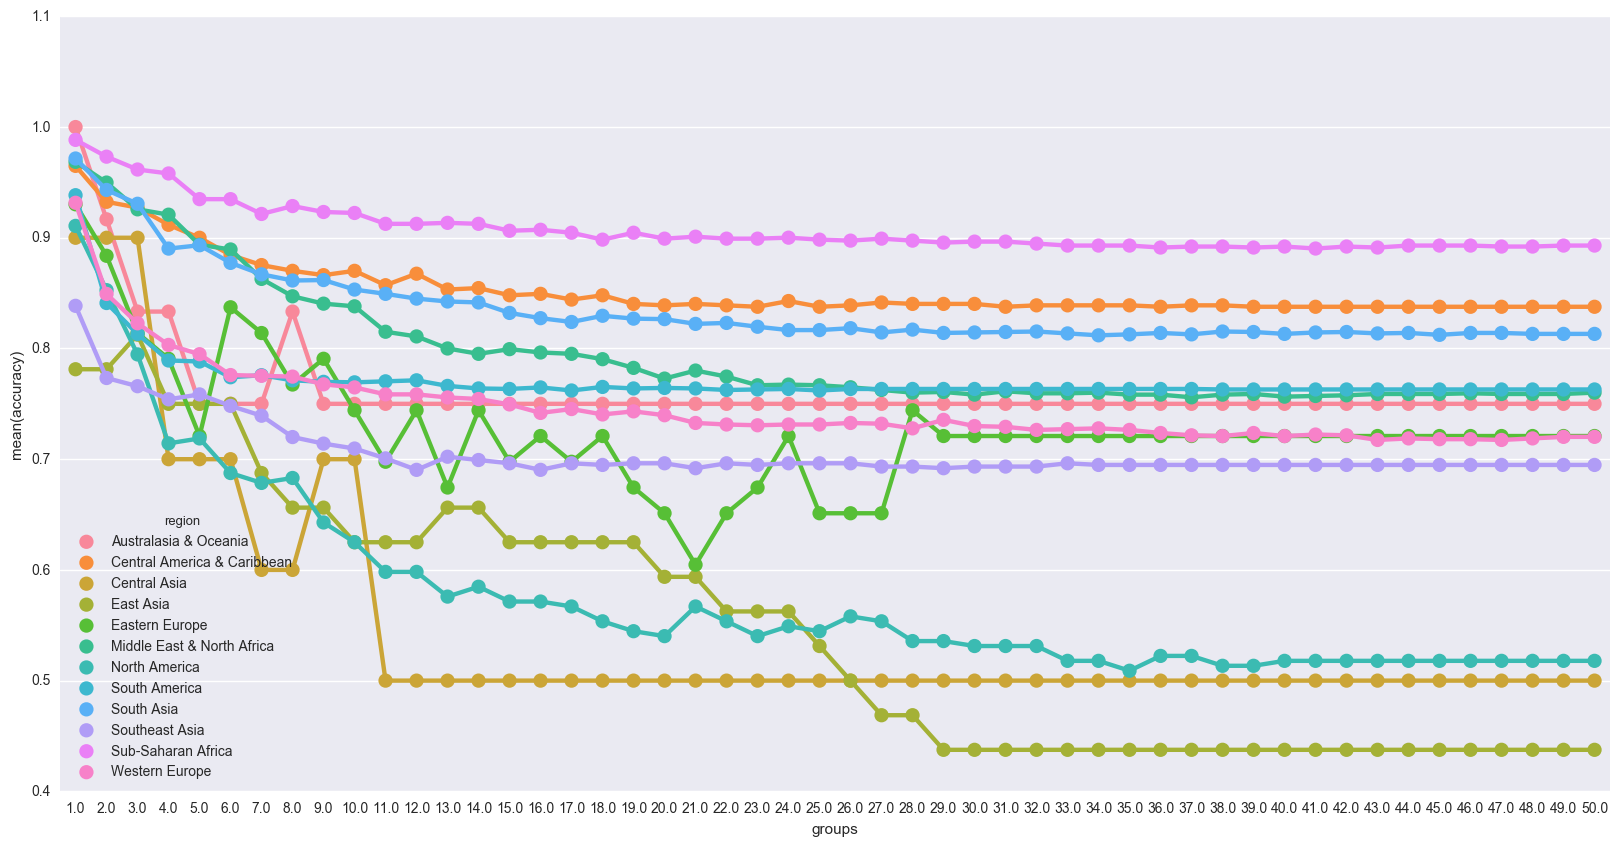

In [34]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.pointplot(x="groups", y="accuracy", hue="region", data=results)

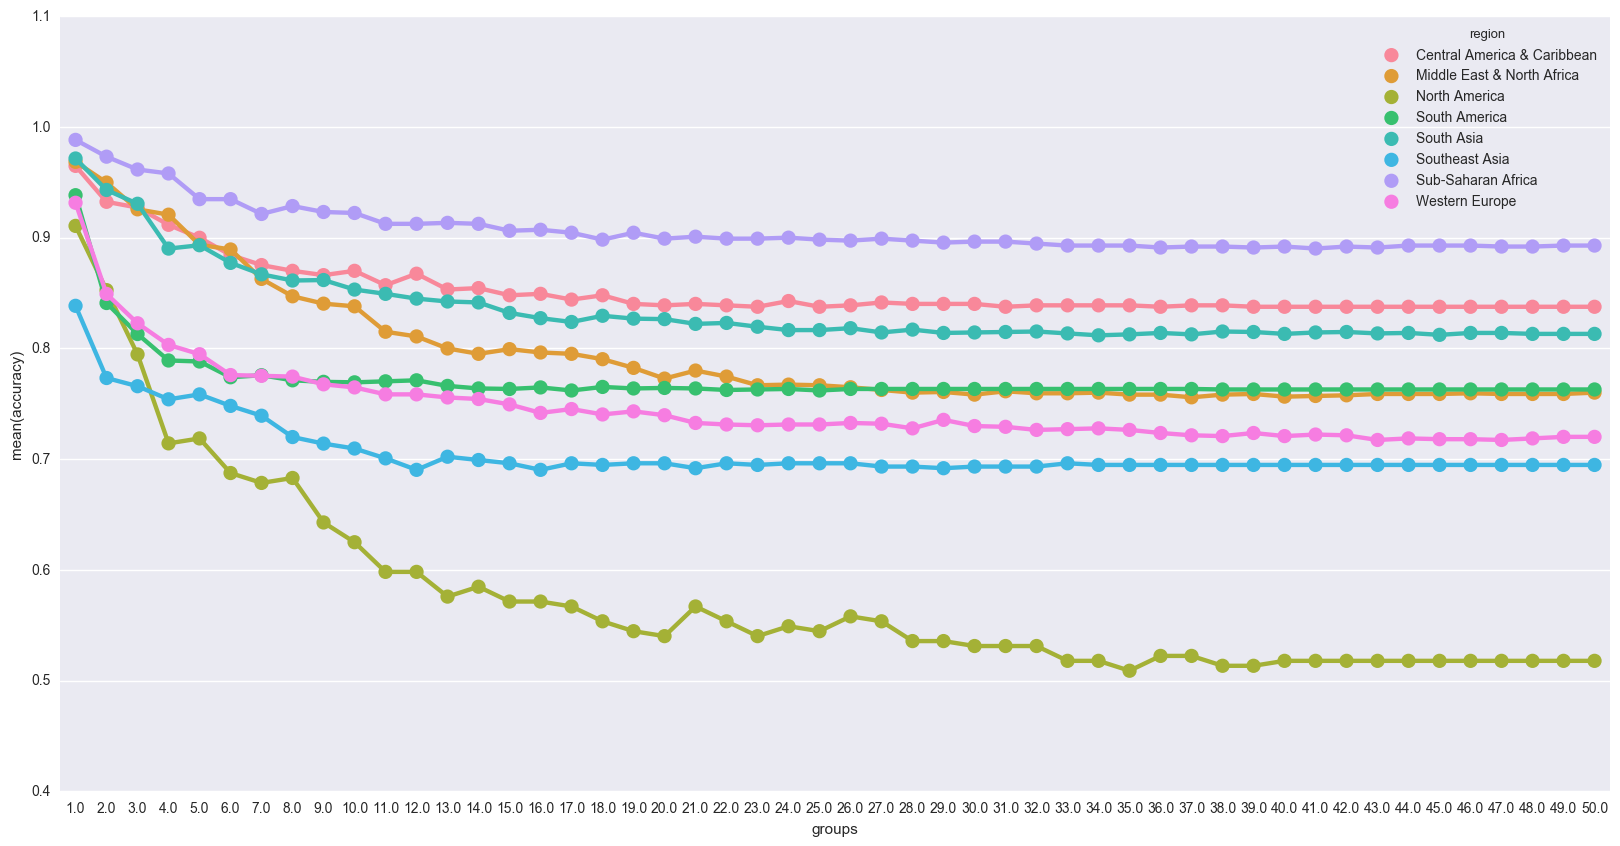

In [35]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.pointplot(x="groups", y="accuracy", hue="region", data=results.loc[(results["region"] != "Australasia & Oceania") &
                                                                           (results["region"] != "Eastern Europe") &
                                                                           (results["region"] != "Central Asia") &
                                                                           (results["region"] != "East Asia")])

In [64]:
data_with_unknown = pd.read_csv("terrorism_with_unknown_cleaned.csv")

In [65]:
data_with_unknown[data_with_unknown.gname == "Unknown"]["region_txt"].value_counts()

Middle East & North Africa     21488
South Asia                     16534
South America                   4814
Southeast Asia                  4336
Western Europe                  4304
Sub-Saharan Africa              4222
Central America & Caribbean     2807
Eastern Europe                  2585
North America                    656
East Asia                        393
Central Asia                     348
Australasia & Oceania            135
Name: region_txt, dtype: int64

In [66]:
data_with_unknown = pd.get_dummies(data_with_unknown, columns = ["attacktype1_txt",
                     "targtype1_txt",
                     "weaptype1_txt",
                     "natlty1_txt",
                     "weaptype1_txt",
                     "weapsubtype1_txt"])

Train data

In [67]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=2))

In [57]:
element = [x for x in results_list if x["region"] == "Middle East & North Africa" and x["n_groups"] == 50][0]

In [58]:
element["model"].predict(data_with_unknown[data_with_unknown["region_txt"] == "Middle East & North Africa"].drop(["gname", "region_txt"], axis=1))

ValueError: Number of features of the model must match the input. Model n_features is 162 and input n_features is 302 